In [1]:
import numpy
from pandas import read_csv
import pandas as pd
from numpy import arange
import operator
import pandas as pd
import numpy as np
import operator
import sys
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.patches as mpatches
import seaborn as sns
from gensim.models.keyedvectors import KeyedVectors
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import plotly
import plotly.express as px
from pandas import set_option
from numpy import set_printoptions
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [2]:
!pip install wandb
import wandb
wandb.init(project="visualize-sklearn")

You should consider upgrading via the '/Users/tmedeiros/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


wandb: Currently logged in as: tmedeiros (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.13 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [3]:
stocks_df = read_csv('../notebooks/content/stocks_df_vectors.csv', )
stocks_df

,Symbol,open,high,low,close,volume,change,Vector1,Vector2,Vector3,Vector4
0,A,49.187863,49.600059,48.782026,49.202025,2.338039e+06,0.000288,-0.1893,-0.6810,-1.1608,-0.2159
1,AAL,38.390495,38.955554,37.825605,38.393252,9.390321e+06,0.000072,-0.1112,-0.2662,-1.7613,3.5104
2,AAP,132.439631,133.818297,131.036025,132.433463,1.078043e+06,-0.000047,0.9275,-0.0713,-0.5302,0.5656
3,AAPL,109.055429,109.951118,108.141589,109.066698,5.404790e+07,0.000103,0.3828,-0.5570,-0.7429,0.0718
4,ABBV,60.802801,61.474133,60.177275,60.864440,7.870683e+06,0.001014,0.1802,-1.1673,-0.7491,1.0102
...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,41.415473,41.763885,41.076026,41.434095,1.183141e+06,0.000450,0.1740,-0.2190,-1.0229,-0.6488
501,YUM,75.422099,76.027123,74.844914,75.451009,3.209032e+06,0.000383,0.2349,-1.1265,-0.5574,-0.6951
502,ZBH,105.542014,106.419854,104.698038,105.606291,1.297144e+06,0.000609,-0.0466,-1.1366,-0.7960,-1.0415
503,ZION,32.161477,32.509290,31.802241,32.171790,2.621178e+06,0.000321,-0.6403,1.7668,-2.7968,-0.0854


In [4]:
stocks_df = stocks_df[['open', 'high', 'low', 'close', 'volume', 'change', 'Vector1', 'Vector2', 'Vector3', 'Vector4']]
target = stocks_df.pop("change")
stocks_df

,open,high,low,close,volume,Vector1,Vector2,Vector3,Vector4
0,49.187863,49.600059,48.782026,49.202025,2.338039e+06,-0.1893,-0.6810,-1.1608,-0.2159
1,38.390495,38.955554,37.825605,38.393252,9.390321e+06,-0.1112,-0.2662,-1.7613,3.5104
2,132.439631,133.818297,131.036025,132.433463,1.078043e+06,0.9275,-0.0713,-0.5302,0.5656
3,109.055429,109.951118,108.141589,109.066698,5.404790e+07,0.3828,-0.5570,-0.7429,0.0718
4,60.802801,61.474133,60.177275,60.864440,7.870683e+06,0.1802,-1.1673,-0.7491,1.0102
...,...,...,...,...,...,...,...,...,...
500,41.415473,41.763885,41.076026,41.434095,1.183141e+06,0.1740,-0.2190,-1.0229,-0.6488
501,75.422099,76.027123,74.844914,75.451009,3.209032e+06,0.2349,-1.1265,-0.5574,-0.6951
502,105.542014,106.419854,104.698038,105.606291,1.297144e+06,-0.0466,-1.1366,-0.7960,-1.0415
503,32.161477,32.509290,31.802241,32.171790,2.621178e+06,-0.6403,1.7668,-2.7968,-0.0854


In [5]:
target

0      0.000288
1      0.000072
2     -0.000047
3      0.000103
4      0.001014
         ...   
500    0.000450
501    0.000383
502    0.000609
503    0.000321
504    0.000161
Name: change, Length: 505, dtype: float64

In [6]:
set_option('precision', 4)
print(stocks_df.describe())

            open       high        low      close      volume   Vector1  \
count   505.0000   505.0000   505.0000   505.0000  5.0500e+02  505.0000   
mean     82.6069    83.3591    81.8421    82.6267  4.3086e+06    0.6426   
std      91.9848    92.7920    91.1383    91.9939  7.0257e+06    0.8977   
min       5.6043     5.7172     5.4866     5.6019  1.7037e+05   -1.1390   
25%      42.3795    42.7627    42.0194    42.4021  1.3204e+06    0.1016   
50%      64.1438    64.8747    63.5783    64.1821  2.3212e+06    0.3878   
75%      94.8540    95.6698    94.0348    94.9062  4.3525e+06    0.8570   
max    1312.6785  1324.1832  1300.6522  1312.8735  9.3634e+07    3.8755   

        Vector2   Vector3   Vector4  
count  505.0000  505.0000  505.0000  
mean    -0.2985   -0.6808   -0.0595  
std      0.9588    0.9884    1.5105  
min     -2.3721   -2.9830   -3.1509  
25%     -0.9660   -1.2455   -1.1581  
50%     -0.4387   -0.8367   -0.2284  
75%      0.2172   -0.4143    0.8023  
max      2.9976    2

In [7]:
# correlation
set_option('precision', 4)
print(stocks_df.corr(method='pearson'))

           open    high     low   close  volume  Vector1  Vector2  Vector3  \
open     1.0000  1.0000  1.0000  1.0000 -0.1731  -0.1121  -0.1523  -0.0076   
high     1.0000  1.0000  1.0000  1.0000 -0.1731  -0.1123  -0.1514  -0.0084   
low      1.0000  1.0000  1.0000  1.0000 -0.1731  -0.1121  -0.1533  -0.0068   
close    1.0000  1.0000  1.0000  1.0000 -0.1731  -0.1122  -0.1524  -0.0076   
volume  -0.1731 -0.1731 -0.1731 -0.1731  1.0000  -0.0893   0.1641  -0.1665   
Vector1 -0.1121 -0.1123 -0.1121 -0.1122 -0.0893   1.0000  -0.1346   0.8233   
Vector2 -0.1523 -0.1514 -0.1533 -0.1524  0.1641  -0.1346   1.0000  -0.6559   
Vector3 -0.0076 -0.0084 -0.0068 -0.0076 -0.1665   0.8233  -0.6559   1.0000   
Vector4 -0.0421 -0.0404 -0.0440 -0.0422  0.0858   0.0476   0.4673  -0.3398   

         Vector4  
open     -0.0421  
high     -0.0404  
low      -0.0440  
close    -0.0422  
volume    0.0858  
Vector1   0.0476  
Vector2   0.4673  
Vector3  -0.3398  
Vector4   1.0000  


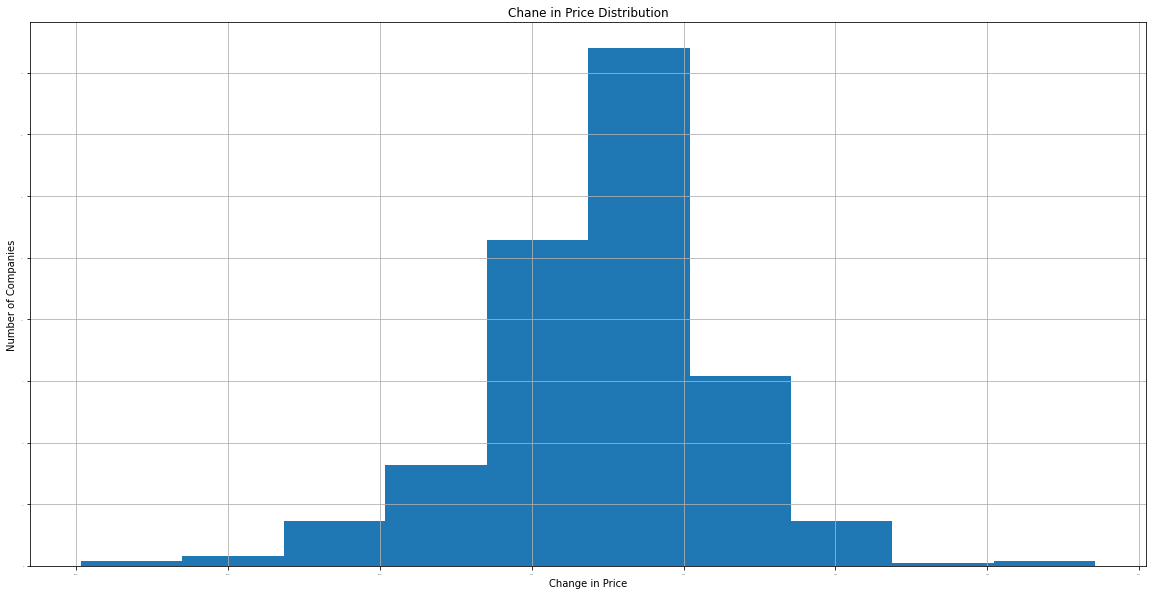

In [8]:
plt.rc('figure', figsize=(20,10))
#target.hist(xlabelsize=1, ylabelsize=1)
target2 = np.expm1((target + abs(target.min())) / 200)
target2 = np.log1p(target2)
target.hist(xlabelsize=1, ylabelsize=1)
pyplot.title('Chane in Price Distribution')
pyplot.xlabel('Change in Price')
pyplot.ylabel('Number of Companies')
pyplot.show()

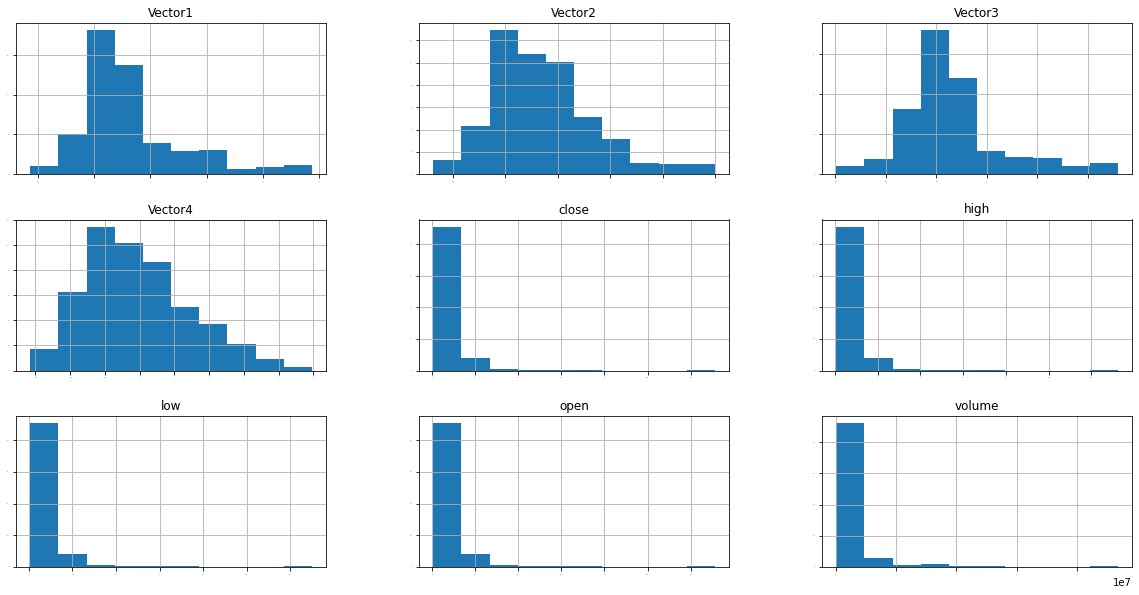

In [9]:
stocks_df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

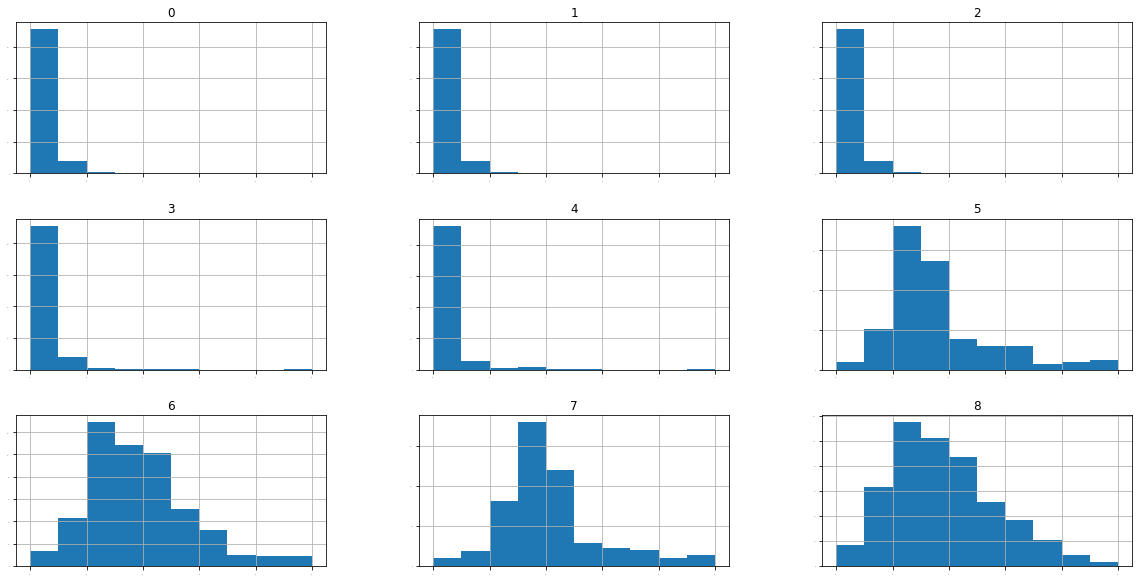

In [10]:
x = stocks_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
stocks_df2 = pd.DataFrame(x_scaled)
stocks_df2.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

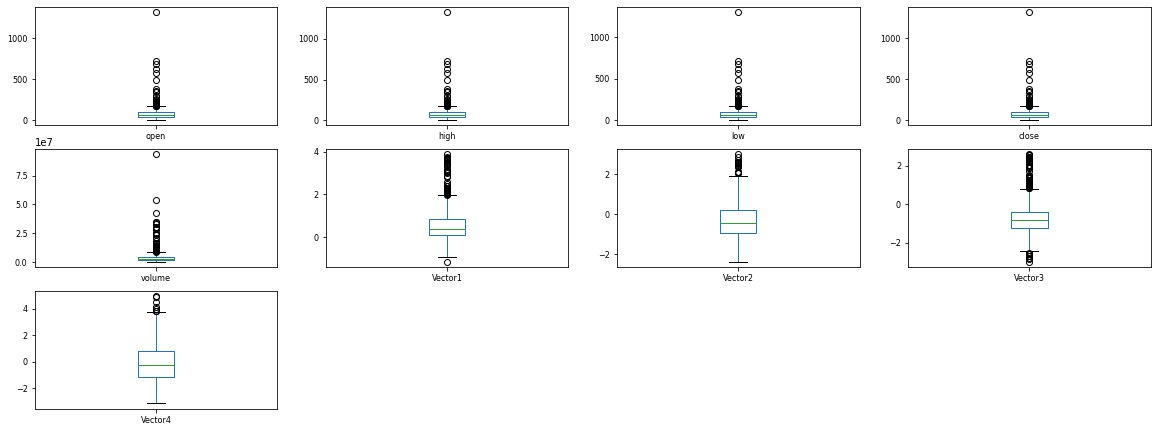

In [11]:
stocks_df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
pyplot.show()

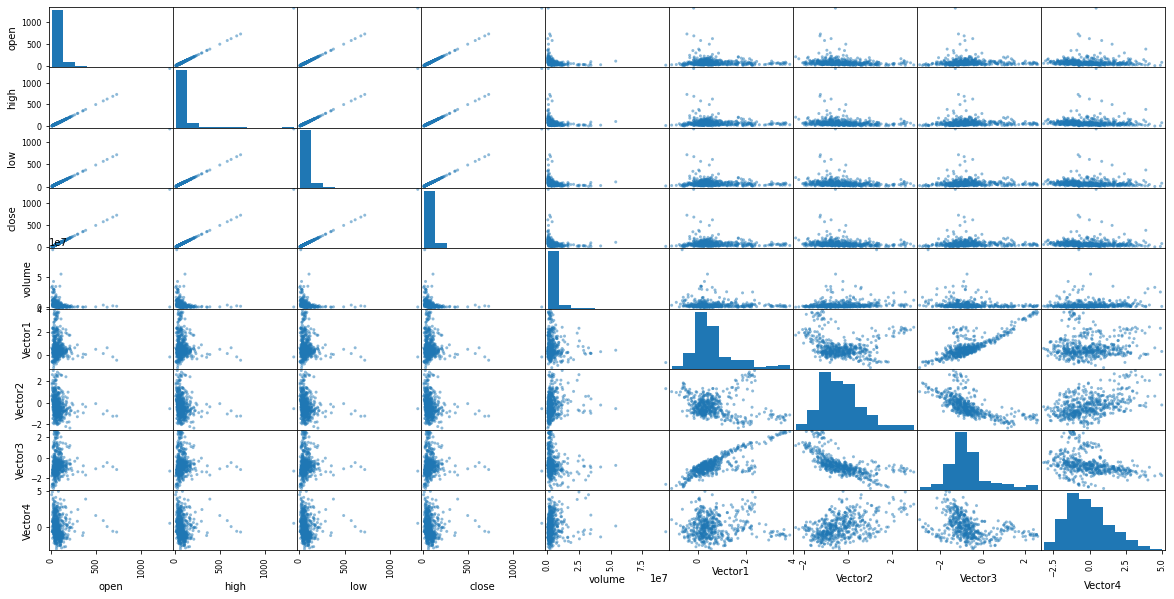

In [12]:
scatter_matrix(stocks_df)
pyplot.show()

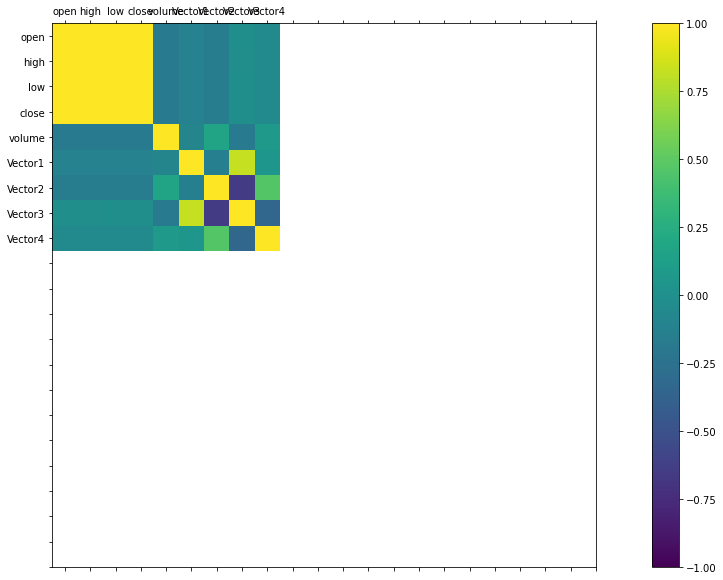

In [13]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(stocks_df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,22,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(stocks_df.columns)
ax.set_yticklabels(stocks_df.columns)
pyplot.show()

In [14]:
# Split-out validation dataset
array = stocks_df.values
X = array[:,0:11]
Y = target
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [15]:
num_folds = 10
seed = 7
#scoring = 'neg_mean_squared_error'
#scoring = 'neg_mean_squared_log_error'
#scoring = 'explained_variance'
scoring = 'r2'

In [16]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [17]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.431192 (0.554441)
LASSO: 0.014358 (0.073731)
EN: 0.014350 (0.073823)
KNN: -0.183049 (0.278417)
CART: -0.871785 (0.563152)
SVR: -0.061357 (0.078846)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: Futur

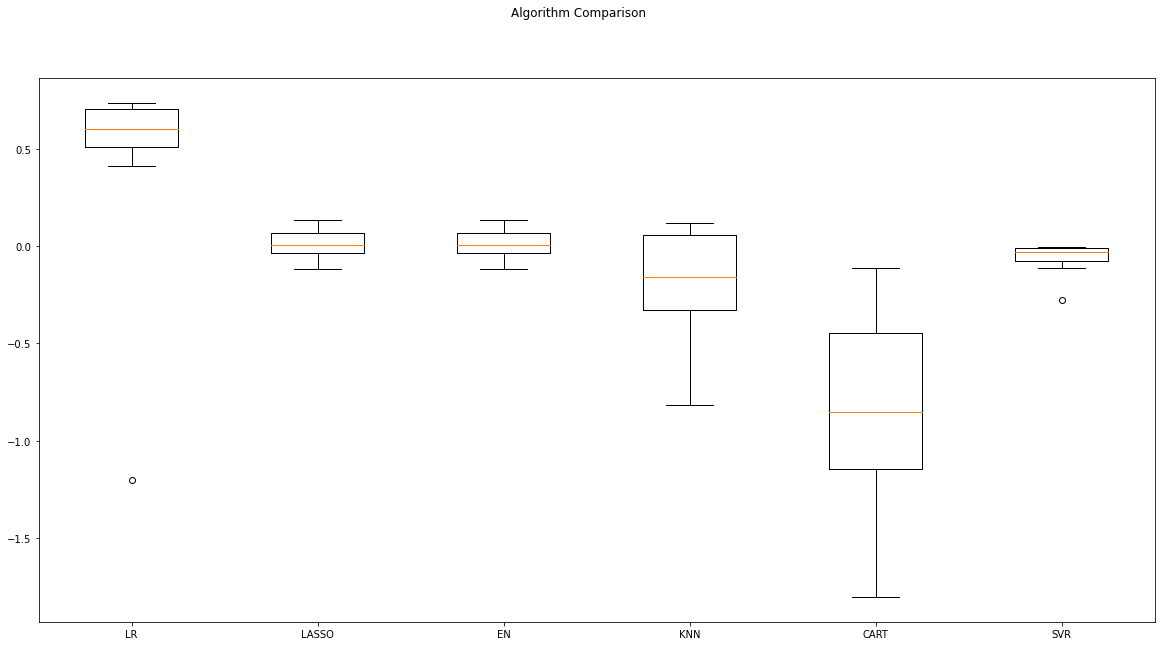

In [18]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [19]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.431192 (0.554441)
ScaledLASSO: -0.006752 (0.007315)
ScaledEN: -0.006752 (0.007315)
ScaledKNN: 0.083639 (0.178553)
ScaledCART: -0.862839 (0.509905)
ScaledSVR: -0.061357 (0.078846)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: Futur

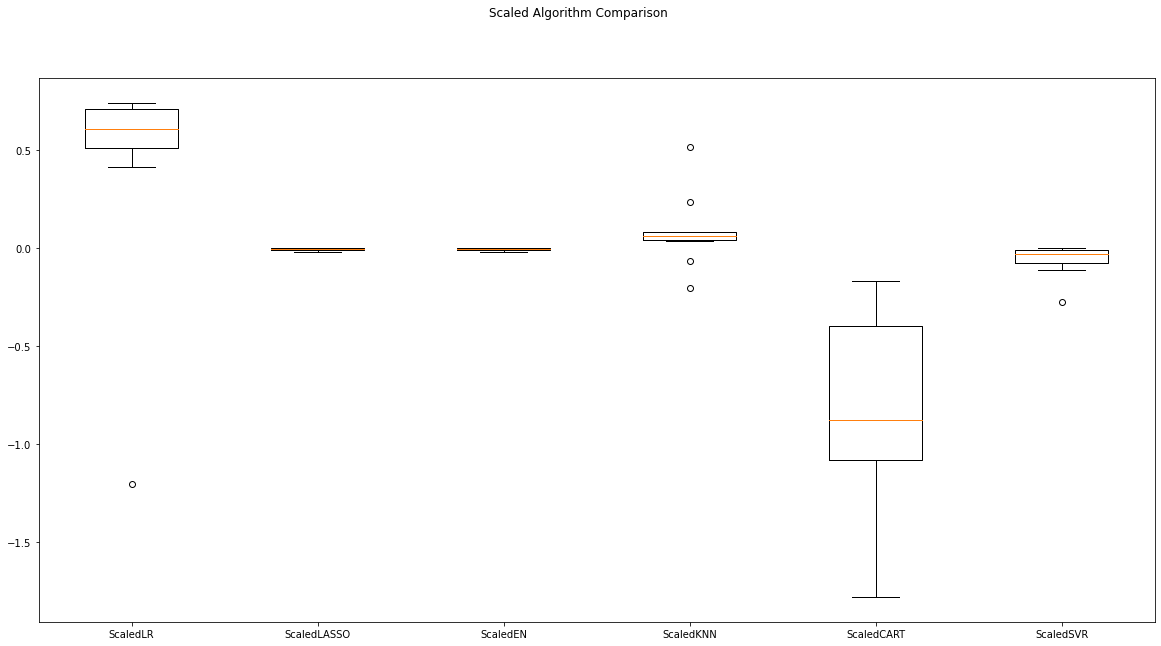

In [20]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [21]:
# ensembles
ensembles = []
ensembles.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
ensembles.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
ensembles.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledLR: 0.431192 (0.554441)
ScaledAB: 0.120065 (0.165020)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledGBM: 0.162154 (0.145355)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledRF: 0.099739 (0.197431)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledET: 0.139156 (0.196930)
ScaledSVR: -0.061357 (0.078846)
ScaledKNN: 0.083639 (0.178553)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


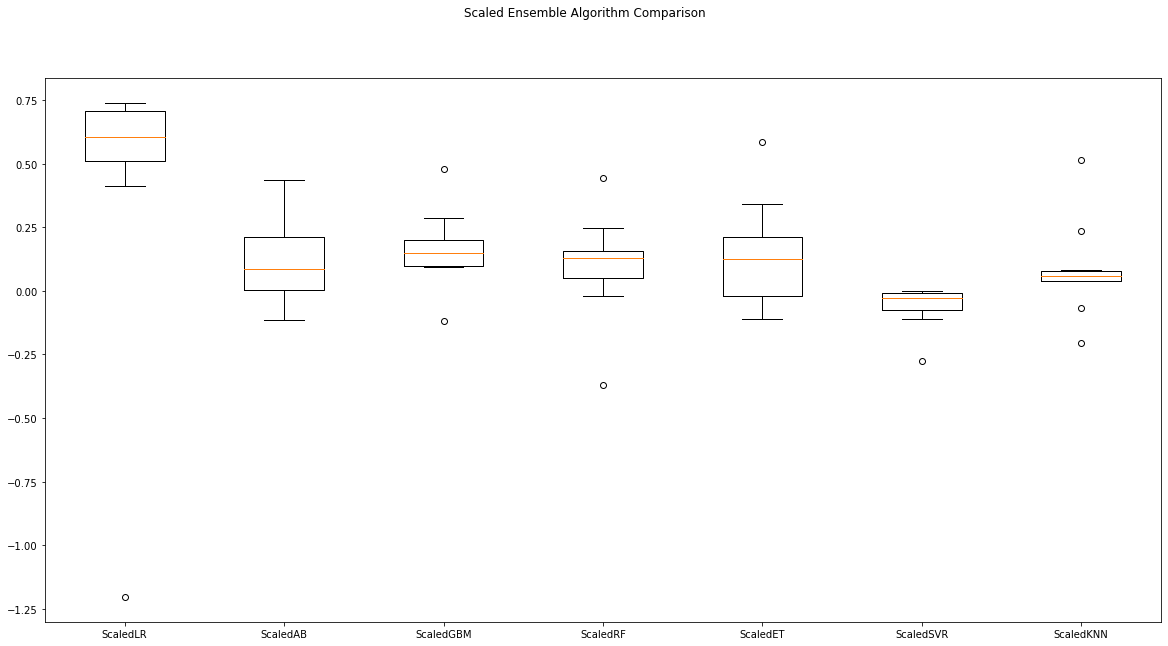

In [22]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Tune scaled LinearRegression

In [54]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
model = LinearRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [55]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.440029 using {'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.440029 (0.255049) with: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.440029 (0.255049) with: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
-0.094502 (0.480614) with: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
-0.094502 (0.480614) with: {'copy_X': True, 'fit_intercept': False, 'normalize': False}
0.440029 (0.255049) with: {'copy_X': False, 'fit_intercept': True, 'normalize': True}
0.440029 (0.255049) with: {'copy_X': False, 'fit_intercept': True, 'normalize': False}
-0.094502 (0.480614) with: {'copy_X': False, 'fit_intercept': False, 'normalize': True}
-0.094502 (0.480614) with: {'copy_X': False, 'fit_intercept': False, 'normalize': False}


# Tune scaled RandomForestRegressor

In [36]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [37]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.068498 using {'n_estimators': 150}
-0.099422 (0.193977) with: {'n_estimators': 50}
-0.077178 (0.185501) with: {'n_estimators': 100}
-0.068498 (0.179935) with: {'n_estimators': 150}
-0.071997 (0.177948) with: {'n_estimators': 200}
-0.075493 (0.178931) with: {'n_estimators': 250}
-0.073707 (0.174295) with: {'n_estimators': 300}
-0.071090 (0.172651) with: {'n_estimators': 350}
-0.072229 (0.173556) with: {'n_estimators': 400}


## Tune scaled KNeighborsRegressor

In [38]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
#model = ElasticNet()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [39]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.003585 using {'n_neighbors': 13}
-0.900362 (0.376357) with: {'n_neighbors': 1}
-0.213863 (0.207322) with: {'n_neighbors': 3}
-0.111852 (0.172217) with: {'n_neighbors': 5}
-0.092246 (0.168203) with: {'n_neighbors': 7}
-0.050874 (0.152674) with: {'n_neighbors': 9}
-0.009587 (0.147543) with: {'n_neighbors': 11}
-0.003585 (0.137143) with: {'n_neighbors': 13}
-0.010652 (0.135703) with: {'n_neighbors': 15}
-0.011567 (0.124636) with: {'n_neighbors': 17}
-0.014393 (0.121447) with: {'n_neighbors': 19}
-0.007780 (0.112154) with: {'n_neighbors': 21}


## Tune scaled SVR Algorithm

In [40]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
#param_grid = dict(n_neighbors=k_values)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4]
param_grid = {'C': Cs, 'gamma' : gammas, 'epsilon' : epsilon}
model = SVR(kernel='rbf')
#model = ElasticNet()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [41]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.061357 using {'C': 0.001, 'epsilon': 2, 'gamma': 0.001}
-0.676884 (0.313532) with: {'C': 0.001, 'epsilon': 0, 'gamma': 0.001}
-0.518115 (0.298840) with: {'C': 0.001, 'epsilon': 0, 'gamma': 0.01}
-0.192958 (0.245222) with: {'C': 0.001, 'epsilon': 0, 'gamma': 0.1}
-0.230252 (0.237422) with: {'C': 0.001, 'epsilon': 0, 'gamma': 1}
-0.061357 (0.078846) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 0.001}
-0.061357 (0.078846) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 0.01}
-0.061357 (0.078846) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 0.1}
-0.061357 (0.078846) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 1}
-0.061357 (0.078846) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 0.001}
-0.061357 (0.078846) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 0.01}
-0.061357 (0.078846) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 0.1}
-0.061357 (0.078846) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 1}
-0.061357 (0.078846) with: {'C': 0.001, 'epsilon': 0.5, 'gamma': 0.001}
-0.061357 (0.078846) wit

##  Tune scaled GBM

In [42]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [43]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.007746 using {'n_estimators': 50}
-0.007746 (0.133763) with: {'n_estimators': 50}
-0.095510 (0.170671) with: {'n_estimators': 100}
-0.141126 (0.185135) with: {'n_estimators': 150}
-0.174018 (0.197903) with: {'n_estimators': 200}
-0.215148 (0.204980) with: {'n_estimators': 250}
-0.245693 (0.220913) with: {'n_estimators': 300}
-0.274774 (0.241064) with: {'n_estimators': 350}
-0.292420 (0.245698) with: {'n_estimators': 400}


## Tune scaled AdaBoostRegressor

In [44]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = AdaBoostRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [45]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.028338 using {'n_estimators': 50}
0.028338 (0.084591) with: {'n_estimators': 50}
0.028338 (0.084591) with: {'n_estimators': 100}
0.028338 (0.084591) with: {'n_estimators': 150}
0.028338 (0.084591) with: {'n_estimators': 200}
0.028338 (0.084591) with: {'n_estimators': 250}
0.028338 (0.084591) with: {'n_estimators': 300}
0.028338 (0.084591) with: {'n_estimators': 350}
0.028338 (0.084591) with: {'n_estimators': 400}


# Preparing the Model

In [103]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsRegressor(n_neighbors=19)
model.fit(rescaledX, Y_train)

KNeighborsRegressor(n_neighbors=19)

In [104]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
#print(mean_squared_log_error(Y_validation, predictions))
#print(explained_variance_score(Y_validation, predictions))
print(r2_score(Y_validation, predictions))

0.14742677832669493


In [105]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)

RandomForestRegressor(random_state=7)

In [106]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
#print(mean_squared_log_error(Y_validation, predictions))
#print(explained_variance_score(Y_validation, predictions))
print(r2_score(Y_validation, predictions))

-0.5483343592048384


In [107]:
#Best: -0.093469 using {'C': 10, 'epsilon': 2, 'gamma': 0.1}
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVR(C=10, epsilon=2, gamma=0.1)
model.fit(rescaledX, Y_train)

SVR(C=10, epsilon=2, gamma=0.1)

In [108]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
#print(mean_squared_log_error(Y_validation, predictions))
print(explained_variance_score(Y_validation, predictions))
#print(r2_score(Y_validation, predictions))

0.1613409511977515


In [109]:
model.score(X_validation, Y_validation)

-0.00026514740336147646

In [110]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=50)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=50, random_state=7)

In [111]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
#print(mean_squared_log_error(Y_validation, predictions))
#print(explained_variance_score(Y_validation, predictions))
print(r2_score(Y_validation, predictions))

-2.054505551627879


In [112]:
# prepare the model AdaBoostRegressor
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = AdaBoostRegressor(random_state=seed, n_estimators=150)
model.fit(rescaledX, Y_train)

AdaBoostRegressor(n_estimators=150, random_state=7)

In [113]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
#print(mean_squared_log_error(Y_validation, predictions))
#print(explained_variance_score(Y_validation, predictions))
print(r2_score(Y_validation, predictions))

0.1511742222821688


In [114]:
predictions.tolist()

[22.03344594594595,
 23.09852398523985,
 23.09852398523985,
 23.69244604316544,
 20.503717472118936,
 23.707042253521134,
 22.03344594594595,
 22.03344594594595,
 22.03344594594595,
 24.34363636363637,
 20.503717472118936,
 22.195564516129,
 22.03344594594595,
 22.195564516129,
 23.707042253521134,
 22.03344594594595,
 25.834374999999994,
 22.03344594594595,
 25.834374999999994,
 22.03344594594595,
 24.34363636363637,
 25.834374999999994,
 23.707042253521134,
 21.884232365145195,
 23.09852398523985,
 23.69244604316544,
 22.03344594594595,
 25.386046511627907,
 24.34363636363637,
 41.57500000000001,
 25.386046511627907,
 25.834374999999994,
 22.03344594594595,
 20.503717472118936,
 22.03344594594595,
 22.03344594594595,
 22.195564516129,
 22.03344594594595,
 22.195564516129,
 23.707042253521134,
 22.195564516129,
 24.34363636363637,
 22.195564516129,
 20.503717472118936,
 21.884232365145195,
 22.03344594594595,
 23.69244604316544,
 23.09852398523985,
 22.03344594594595,
 24.343636363636

In [115]:
print(Y_validation.values.tolist())

[17.0, 34.2, 37.2, 20.5, 16.2, 20.0, 19.8, 13.6, 14.4, 30.8, 31.9, 19.4, 18.0, 32.2, 24.5, 24.8, 19.2, 31.4, 24.4, 23.5, 23.0, 26.3, 19.7, 15.4, 16.2, 21.9, 20.6, 33.4, 28.1, 48.4, 13.5, 26.7, 16.1, 29.7, 18.5, 21.7, 20.0, 20.6, 17.7, 18.2, 13.5, 35.1, 30.8, 12.9, 23.3, 30.6, 33.9, 12.2, 31.9, 34.4, 14.5, 13.0, 22.3, 26.3, 25.2, 33.2, 27.0, 24.4, 32.9, 35.0, 11.5, 13.6, 29.8, 25.4, 25.8, 27.6, 45.9, 37.0, 37.7, 20.1, 13.1, 22.8, 24.5, 41.3, 22.6, 26.6, 15.8, 28.3, 11.2, 32.8, 35.1, 29.1, 21.4, 15.4, 26.9, 31.0, 23.1, 35.4, 12.9, 25.1, 26.6, 17.0, 22.0]


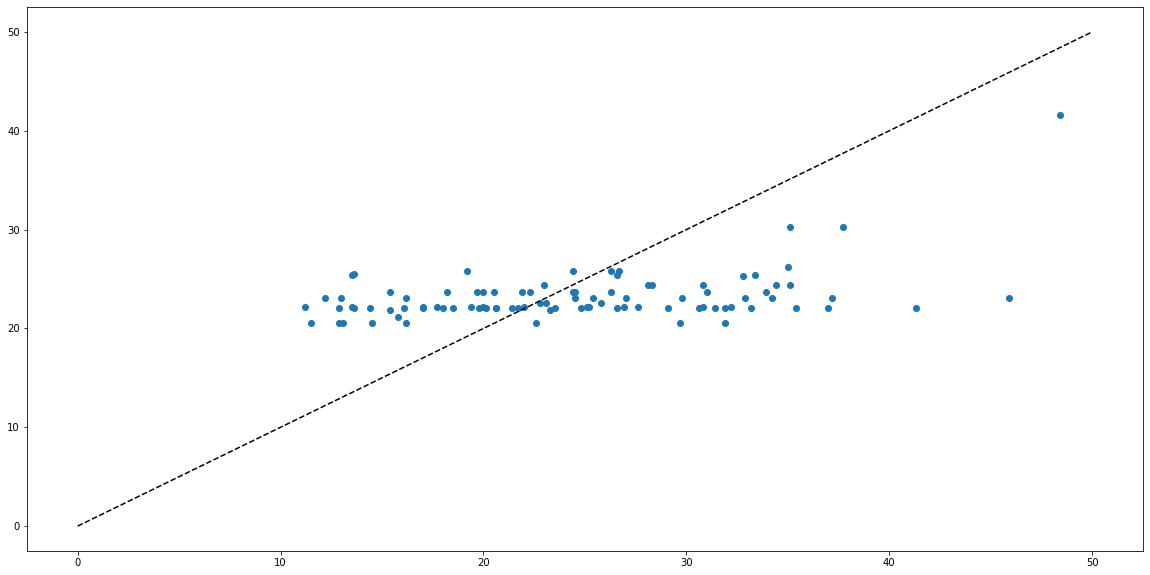

In [116]:
plt.scatter(Y_validation.values.tolist(), predictions.tolist())
plt.plot([0, 50], [0, 50], '--k')

In [46]:
wandb.sklearn.plot_outlier_candidates(model, X_train, predictions)

NameError: name 'wandb' is not defined

In [118]:
dataset

,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,vector1,vector2,vector3,vector4
0,222.89,24.31,2.3329,7.92,259.77,175.490,1.3872e+11,0.3047,-1.1492,-0.3533,-2.8370
1,60.24,27.76,1.1480,1.70,68.39,48.925,1.0783e+10,-0.2140,-0.4369,-1.2729,-0.7849
2,56.27,22.51,1.9090,0.26,64.60,42.280,1.0212e+11,0.1297,-1.1131,-0.6357,-1.0210
3,108.48,19.41,2.4996,3.29,125.86,60.050,1.8139e+11,0.1802,-1.1673,-0.7491,1.0102
4,150.51,25.47,1.7145,5.44,162.60,114.820,9.8766e+10,0.2285,-0.4749,-0.7828,-2.1630
...,...,...,...,...,...,...,...,...,...,...,...
500,70.24,30.94,1.1701,1.83,76.81,46.860,1.2915e+10,0.1740,-0.2190,-1.0229,-0.6488
501,76.30,27.25,1.7971,4.07,86.93,62.850,2.7003e+10,0.2349,-1.1265,-0.5574,-0.6951
502,115.53,14.32,0.7948,9.01,133.49,108.170,2.4455e+10,-0.0466,-1.1366,-0.7960,-1.0415
503,50.71,17.73,1.4809,2.60,55.61,38.430,1.0671e+10,-0.6403,1.7668,-2.7968,-0.0854


In [119]:
#columns_fi = ['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share', '52_week_low', '52_week_high', 'market_cap', 'esg_rating']
esg2 = dataset
esg2["esg_rating"] = target
esg2.head()

<ipython-input-119-2e1bb36fe7be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esg2["esg_rating"] = target


,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,vector1,vector2,vector3,vector4,esg_rating
0,222.89,24.31,2.3329,7.92,259.77,175.490,1.3872e+11,0.3047,-1.1492,-0.3533,-2.8370,34.9
1,60.24,27.76,1.1480,1.70,68.39,48.925,1.0783e+10,-0.2140,-0.4369,-1.2729,-0.7849,32.6
2,56.27,22.51,1.9090,0.26,64.60,42.280,1.0212e+11,0.1297,-1.1131,-0.6357,-1.0210,29.8
3,108.48,19.41,2.4996,3.29,125.86,60.050,1.8139e+11,0.1802,-1.1673,-0.7491,1.0102,29.1
4,150.51,25.47,1.7145,5.44,162.60,114.820,9.8766e+10,0.2285,-0.4749,-0.7828,-2.1630,11.3


In [120]:
esg2.shape

(461, 12)

In [121]:
df_train, df_test = train_test_split(esg2, test_size=0.20)

X_train_fi, y_train_fi = df_train.drop('esg_rating',axis=1), df_train['esg_rating']
X_test_fi, y_test_fi = df_test.drop('esg_rating',axis=1), df_test['esg_rating']
esg_model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
#esg_model = SVR(C=10, epsilon=2, gamma=0.1)
esg_model.fit(X_train_fi, y_train_fi)

RandomForestRegressor(n_jobs=-1)

In [122]:
#!pip install rfpimp
import rfpimp
imp = rfpimp.importances(esg_model, X_test_fi, y_test_fi)

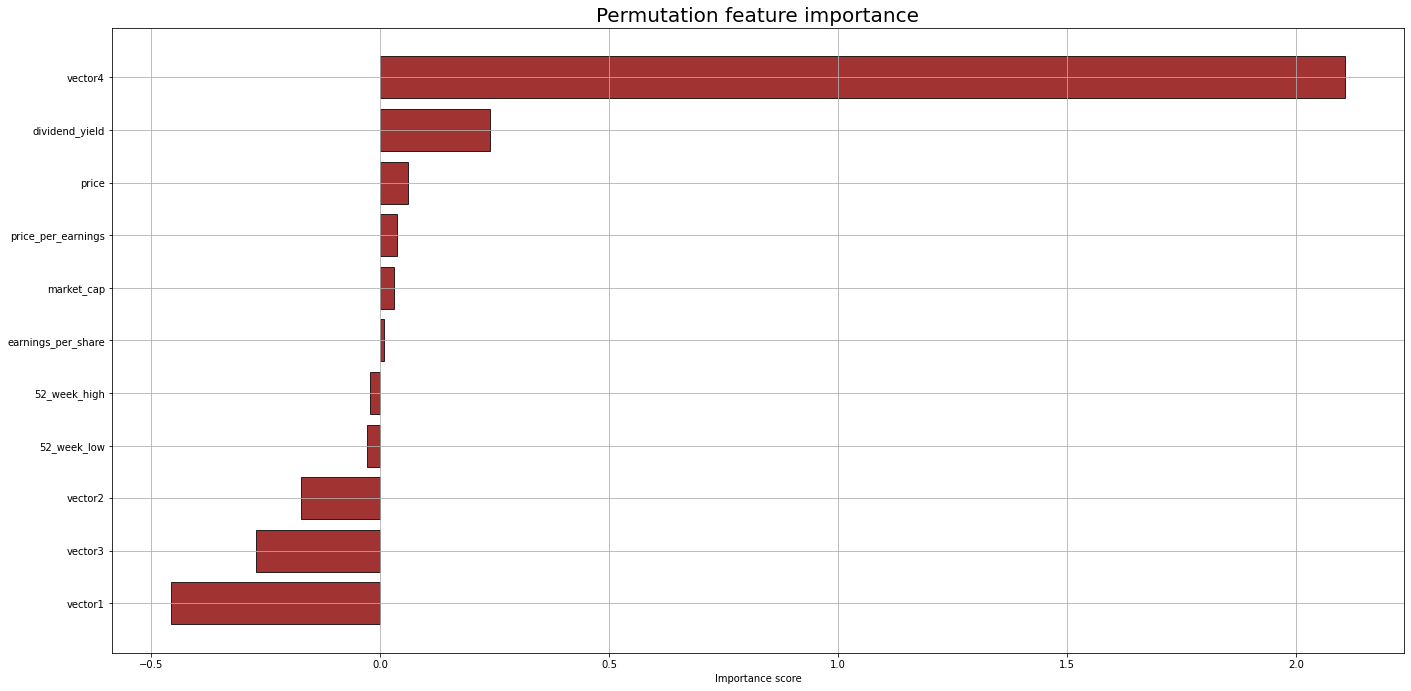

In [123]:
fig, ax = plt.subplots(figsize=(20, 10))
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='darkred', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, '', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.9)
plt.grid(b=None)
plt.gca().invert_yaxis()

fig.tight_layout()

In [124]:
df_train, df_test = train_test_split(esg2, test_size=0.20)

X_train_fi, y_train_fi = df_train.drop('esg_rating',axis=1), df_train['esg_rating']
X_test_fi, y_test_fi = df_test.drop('esg_rating',axis=1), df_test['esg_rating']
#esg_model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
esg_model = SVR(C=10, epsilon=2, gamma=0.1)
esg_model.fit(X_train_fi, y_train_fi)

SVR(C=10, epsilon=2, gamma=0.1)

In [125]:
X_test_fi

,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,vector1,vector2,vector3,vector4
157,74.32,16.70,4.7849,3.12,91.8000,72.9300,5.2078e+10,3.5890,-1.4153,2.4423,-1.0767
207,114.26,36.86,0.0000,2.31,142.1600,97.9600,1.0828e+10,0.2481,-0.7059,-0.7247,-0.8555
34,88.34,15.00,1.4956,2.90,102.3850,75.5100,8.0411e+10,0.1265,-0.1259,-1.0486,-1.6908
137,44.55,16.32,1.0801,2.73,53.3200,29.3716,1.7391e+10,0.0268,-0.6970,-1.2261,2.1158
127,74.73,18.64,3.8002,4.10,89.7000,72.6300,2.3336e+10,3.6355,-1.6120,2.5402,-1.1252
...,...,...,...,...,...,...,...,...,...,...,...
82,63.33,37.04,1.1217,1.70,69.9028,45.4150,5.4980e+09,1.0109,-0.9642,0.0925,-1.1724
397,178.73,26.48,1.7693,6.35,210.7200,147.6700,2.4123e+10,0.1035,0.2323,-1.2943,-1.0538
60,108.25,29.34,2.2191,3.85,125.2400,95.5000,5.0338e+10,0.1372,-1.1860,-0.5288,-2.2191
109,189.27,18.11,0.0205,7.20,227.1300,141.9300,4.7681e+10,0.2241,-0.6737,-0.8999,0.7819


In [126]:
esg2_columns = ['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share',
       '52_week_low', '52_week_high', 'market_cap', 'vector1', 'vector2',
       'vector3', 'vector4', 'esg_rating']
esg2 = esg[['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share',
       '52_week_low', '52_week_high', 'market_cap', 'vector1', 'vector2',
       'vector3', 'vector4', 'esg_rating']]
print(esg2.shape)
esg2.head()

KeyError: "['esg_rating'] not in index"

In [396]:
features = ['vector4']
features2 = ['earnings_per_share']
target = 'esg_rating'
X2 = esg2[features].values.reshape(-1, len(features))
X3 = esg2[features2].values.reshape(-1, len(features2))
Y2 = esg2[target].values

x_pred = np.linspace(0, 40, 200).reshape(-1, len(features)) # prediction line
x_pred3 = np.linspace(0, 40, 200).reshape(-1, len(features2)) # prediction line

In [95]:
from sklearn import linear_model

ols_1 = linear_model.LinearRegression()
model_1 = ols_1.fit(X2, Y2)
response_1 = model_1.predict(x_pred)

NameError: name 'X2' is not defined

In [94]:
model_2 = ols_1.fit(X3, Y2)
response_2 = model_2.predict(x_pred3)

NameError: name 'ols_1' is not defined

NameError: name 'x_pred' is not defined

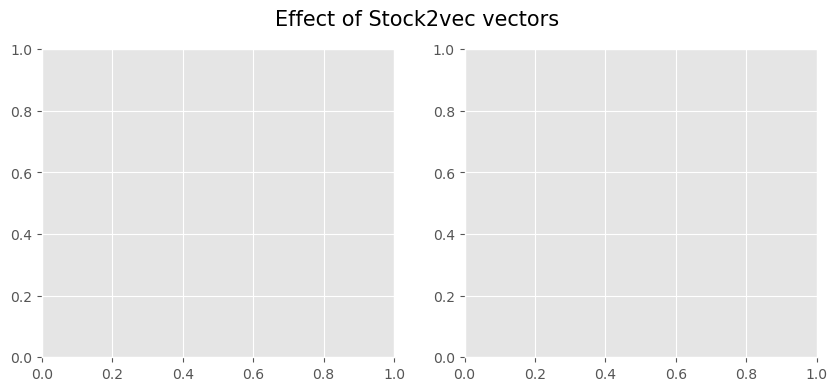

In [127]:
plt.style.use('default')
plt.style.use('ggplot')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Effect of Stock2vec vectors', fontsize=15)

axes[0].plot(x_pred, response_1, color='k', label='Regression model')
axes[0].scatter(X2, Y2, edgecolor='k', facecolor='red', alpha=0.7, label='ESG data')
axes[0].set_ylabel('ESG rating', fontsize=14)
axes[0].set_xlabel('Vector1', fontsize=14)
axes[0].legend(facecolor='white', fontsize=11, loc='best')
axes[0].set_ylim(0, 60)
axes[0].set_xlim(0, 4)
axes[0].text(0.47, 0.15, '$y = %.1f x_1 + %.1f $' % (model_1.coef_[0], model_1.intercept_),
             fontsize=12, transform=axes[0].transAxes)
axes[0].text(0.77, 0.3, '', fontsize=10, ha='center', va='center',
         transform=axes[0].transAxes, color='red', alpha=0.5)

axes[1].plot(x_pred3, response_2, color='k', label='Regression model')
axes[1].scatter(X3, Y2, edgecolor='k', facecolor='red', alpha=0.7, label='ESG Data')
axes[1].set_ylabel('ESG rating', fontsize=14)
axes[1].set_xlabel('Earnings per share', fontsize=14)
axes[1].legend(facecolor='white', fontsize=11, loc='best')
axes[1].set_ylim(0, 60)
axes[1].set_xlim(0, 20)
axes[1].text(0.55, 0.15, '$y = %.1f x_1 + %.1f $' % (model_2.coef_[0], model_2.intercept_),
             fontsize=12, transform=axes[1].transAxes)
axes[1].text(0.77, 0.3, '', fontsize=10, ha='center', va='center',
         transform=axes[1].transAxes, color='red', alpha=0.5)

fig.tight_layout(rect=[0, 0, 1, 0.94])

In [412]:
esg_model.feature_importances_

array([0.033, 0.057, 0.09 , 0.067, 0.021, 0.036, 0.037, 0.099, 0.255,
       0.063, 0.242])

In [426]:
dataset

,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,vector1,vector2,vector3,vector4
0,222.89,24.31,2.3329,7.92,259.77,175.490,1.3872e+11,0.3047,-1.1492,-0.3533,-2.8370
1,60.24,27.76,1.1480,1.70,68.39,48.925,1.0783e+10,-0.2140,-0.4369,-1.2729,-0.7849
2,56.27,22.51,1.9090,0.26,64.60,42.280,1.0212e+11,0.1297,-1.1131,-0.6357,-1.0210
3,108.48,19.41,2.4996,3.29,125.86,60.050,1.8139e+11,0.1802,-1.1673,-0.7491,1.0102
4,150.51,25.47,1.7145,5.44,162.60,114.820,9.8766e+10,0.2285,-0.4749,-0.7828,-2.1630
...,...,...,...,...,...,...,...,...,...,...,...
500,70.24,30.94,1.1701,1.83,76.81,46.860,1.2915e+10,0.1740,-0.2190,-1.0229,-0.6488
501,76.30,27.25,1.7971,4.07,86.93,62.850,2.7003e+10,0.2349,-1.1265,-0.5574,-0.6951
502,115.53,14.32,0.7948,9.01,133.49,108.170,2.4455e+10,-0.0466,-1.1366,-0.7960,-1.0415
503,50.71,17.73,1.4809,2.60,55.61,38.430,1.0671e+10,-0.6403,1.7668,-2.7968,-0.0854
